# Data

In [4]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

# Imports for Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [5]:
#DataFrame for hotel_bookings data
hotel_df = pd.read_csv('Resources/hotel_bookings.csv')
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
hotel_df.shape

(119390, 32)

In [7]:
# Checking datatypes of columns
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Create Correlation matrix
hotel_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [9]:
# Checking for null or missing values
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Copy original data frame into a new one to clean and drop columns/rows with a large amount of null values
hotel2_df = hotel_df.copy()
hotel2_df.drop(columns=['agent','company'],inplace=True)
hotel2_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [11]:
# Dropping null values in columns 'children' and 'country'
hotel2_df = hotel2_df.dropna()
hotel2_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
hotel2_df.to_csv('Resources/hotel_2_data.csv',index=False)

# Exploratory Analysis 

## Reservation information

In [44]:
# Amount of reservations in total
total_reservation = len(hotel2_df.hotel)
print(f" There were a total of {total_reservation:,} reservations")

 There were a total of 118,898 reservations


In [46]:
# Amount of reservations per hotel type
reservation = hotel2_df.hotel.value_counts()
reservation

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [21]:
# Amount of cancelations overall
cancelation = hotel2_df['is_canceled'].sum()
print(f" There were {cancelation:,} cancelations overall") 

 There were 44,153 cancelations overall


In [22]:
# Amount of cancellations per hotel type
resort_c = hotel2_df[hotel2_df["hotel"] == "Resort Hotel"]['is_canceled'].sum()
city_c = hotel2_df[hotel2_df["hotel"] == "City Hotel"]['is_canceled'].sum()
print(f" There were {resort_c:,} cancelations for Resort Hotels and {city_c:,} cancelations for City Hotels.")

 There were 11,077 cancelations for Resort Hotels and 33,076 cancelations for City Hotels.


array([<AxesSubplot:title={'center':'City Hotel'}, xlabel='is_canceled'>,
       <AxesSubplot:title={'center':'Resort Hotel'}, xlabel='is_canceled'>],
      dtype=object)

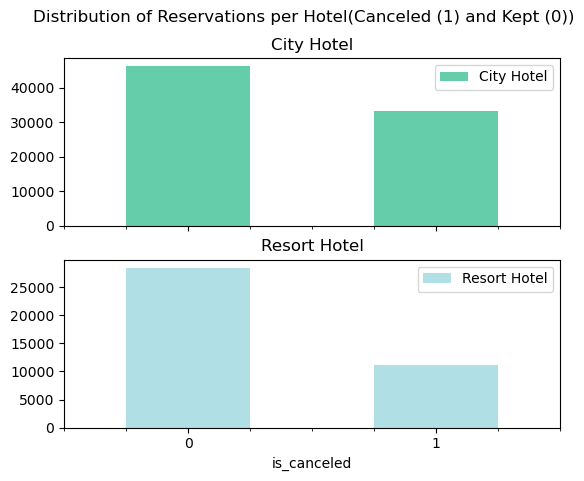

In [48]:
barplot = pd.crosstab(hotel2_df.is_canceled,hotel2_df.hotel)
barplot.plot(kind='bar',rot=0,subplots=True,color = {'powderblue','mediumaquamarine'},
            title='Distribution of Reservations per Hotel(Canceled (1) and Kept (0))')


In [40]:
# Amount of reservations observed per Month
reservation_month = hotel2_df.groupby('arrival_date_month')
reservation_month.count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,11045,11045,11045,11045,11045,11045,11045,11045,11045,11045,...,11045,11045,11045,11045,11045,11045,11045,11045,11045,11045
August,13852,13852,13852,13852,13852,13852,13852,13852,13852,13852,...,13852,13852,13852,13852,13852,13852,13852,13852,13852,13852
December,6728,6728,6728,6728,6728,6728,6728,6728,6728,6728,...,6728,6728,6728,6728,6728,6728,6728,6728,6728,6728
February,8012,8012,8012,8012,8012,8012,8012,8012,8012,8012,...,8012,8012,8012,8012,8012,8012,8012,8012,8012,8012
January,5874,5874,5874,5874,5874,5874,5874,5874,5874,5874,...,5874,5874,5874,5874,5874,5874,5874,5874,5874,5874
July,12628,12628,12628,12628,12628,12628,12628,12628,12628,12628,...,12628,12628,12628,12628,12628,12628,12628,12628,12628,12628
June,10927,10927,10927,10927,10927,10927,10927,10927,10927,10927,...,10927,10927,10927,10927,10927,10927,10927,10927,10927,10927
March,9739,9739,9739,9739,9739,9739,9739,9739,9739,9739,...,9739,9739,9739,9739,9739,9739,9739,9739,9739,9739
May,11779,11779,11779,11779,11779,11779,11779,11779,11779,11779,...,11779,11779,11779,11779,11779,11779,11779,11779,11779,11779


In [ ]:
# Look at relationship between cancelation and proximity of country(all countries)


# Data Preprocessing

## Dropping additional columns that are not necessary for our analysis
### Explanation for dropping our columns:
#### reservation_status_date: does not provide additional information needed for our analysis
#### reserved_room_type: We do not have information about what type of rooms are being assigned, only a letter . Therefore, it does not provide us insight.
#### assigned_room_type: similar explanation to the previous column, no insight is provided with this data.
#### arrival_date_week_number: we have the dates provided so this column is unnecessary
#### distribution_channel: the informatin provided in this column is covered within the market_segment column, therefore unnecessary.


In [ ]:
clean_hotel_df = hotel2_df.copy()
clean_hotel_df.drop(columns = ['reservation_status_date','reserved_room_type','assigned_room_type',
                           'arrival_date_week_number','distribution_channel'],inplace = True)
clean_hotel_df.head(10)

In [ ]:
clean_hotel_df.to_csv('Resources/clean_hotel_df.csv',index = False)